# Unsupervised Machine Learning - Cluster Analysis

In [0]:
## update the latest seaborn (0.9.0)
# !pip install seaborn==0.9.0
# !pip install prophet

In [8]:
## setup our environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## date and timeseries forecasting tooling
import datetime
from fbprophet import Prophet

## machine learning/predictive analytics tools             
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier           
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics
import graphviz 
from sklearn import tree
from sklearn.preprocessing import StandardScaler    # <------------ New Imports start here
from sklearn.cluster import KMeans  
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

# a new matplotlib feature
from mpl_toolkits import mplot3d


## pandas print columns/rows option (100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## set the styling for seaborn (white)
sns.set_style("white")

ModuleNotFoundError: No module named 'fbprophet'

# Cluster Analysis in Python



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/1200px-Cluster-2.svg.png"  height="300" width="420">

---

### What it is:

- Cluster analysis allows us to find patterns in our dataset when we do not have (or want to use) labels for our data of interest.  

- We do this by creating groups of, hopefully, similar records based on the values in the __numeric__ columns that we use.

### What it does:

There are multiple algorithms, but they all basically attempt to:

* group similar records together.  Statistically similarity is based on the values in the columns that we feed to the algorithm.  
* Records are statistically similar if their __computed distance__ is small
* Put the rows in our dataset into groups that group similar records.  

While it may not be intuitive, we do this by:

- Maximize the similarity of the records a given record is grouped with
- Maxmize the **dis**simmilarity between the other clusters (groups) of records

###  The output:

- a numeric, categorical value (1, 2, 3) that identifies the cluster a record is part of

### What it means:

These statistically similar groups of records can be used for:

- Create customer personas
- add a new column in our dataset that can be in Supervised Learning techniques
- Profile the groups to see if attributes of interest are more/less likely to occur in the cluster/group



In [2]:
from sklearn.preprocessing import StandardScaler    
from sklearn.cluster import KMeans  
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

#### What did we do?

1. we added a module that can help us adjust our values in a pandas dataframe by creating a [z-score](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/) for each column we supply

1. imported K-means clustering, an approach where we manually specifiy the number of clusters we want to produce.

1.  we are using a new scientific programming package, `scipy`, and are bringing in two functions that allow us to do [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)

1. lastly are adding a function that will allow us to create the clusters after viewing the dendrogram based on the hierarchical clusltering we imported above

# K-Means Clustering

![](https://cdn-images-1.medium.com/max/1600/1*tWaaZX75oumVwBMcKN-eHA.png)

### Inputs

- the `dataframe` of our __numeric__ inputs that will be used to determine __similiarity__

- the `#` of clusters we want, commonly referred to as `k`

### Outputs

- a numeric value of `k` for each row in our dataframe.   The value represents the grouping, or cluster, value.  


In [3]:
# bring in our dataset
med_raw = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/MedGPA.csv")

In [4]:
med_raw.head()

,Unnamed: 0,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
0,1,D,0,F,3.59,3.62,11,9,9.0,9,38,5
1,2,A,1,M,3.75,3.84,12,13,8.0,12,45,3
2,3,A,1,F,3.24,3.23,9,10,5.0,9,33,19
3,4,A,1,F,3.74,3.69,12,11,7.0,10,40,5
4,5,A,1,F,3.53,3.38,9,11,4.0,11,35,11


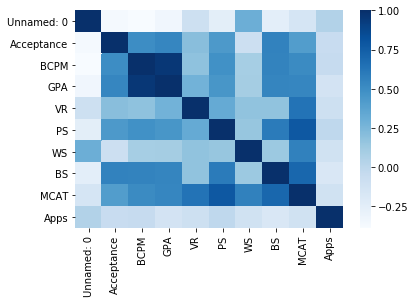

In [9]:
sns.heatmap(med_raw.corr(), cmap="Blues")

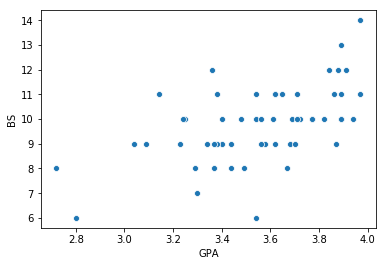

In [10]:
sns.scatterplot(x="GPA", y="BS", data=med_raw)

In a 2D context, where would you draw the line(s) to separate the dataset in half, with higher scores more likely to be admitted to medical school?

In [11]:
# keep just the two columns above
med = med_raw.loc[:, ["GPA", "BS"]]
med.head(2)


,GPA,BS
0,3.62,9
1,3.84,12


In [12]:
# create a 2K cluster
kmeans = KMeans(n_clusters=2)

In [13]:
# fit the model
kmeans.fit(med)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# get the cluster labels
med_k = kmeans.predict(med)

In [15]:
# what do we have?
type(med_k)

numpy.ndarray

In [16]:
# first few values of the array
med_k[:5]

array([0, 1, 0, 1, 1], dtype=int32)

In [18]:
# put the cluster label onto the original dataset
med_raw['c2'] = med_k


In [19]:
med_raw.head()

,Unnamed: 0,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps,c2
0,1,D,0,F,3.59,3.62,11,9,9.0,9,38,5,0
1,2,A,1,M,3.75,3.84,12,13,8.0,12,45,3,1
2,3,A,1,F,3.24,3.23,9,10,5.0,9,33,19,0
3,4,A,1,F,3.74,3.69,12,11,7.0,10,40,5,1
4,5,A,1,F,3.53,3.38,9,11,4.0,11,35,11,1


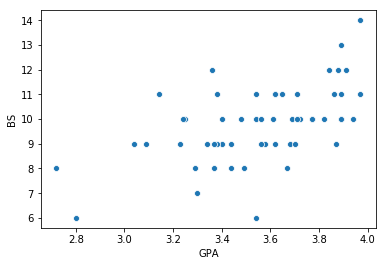

In [20]:
# plot the scatterplot - but hue by cluster
sns.scatterplot(x="GPA", y="BS", data=med_raw)

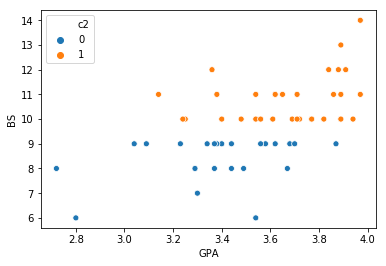

In [21]:
# plot the scatterplot - but hue by cluster
sns.scatterplot(x="GPA", y="BS", data=med_raw, hue="c2")

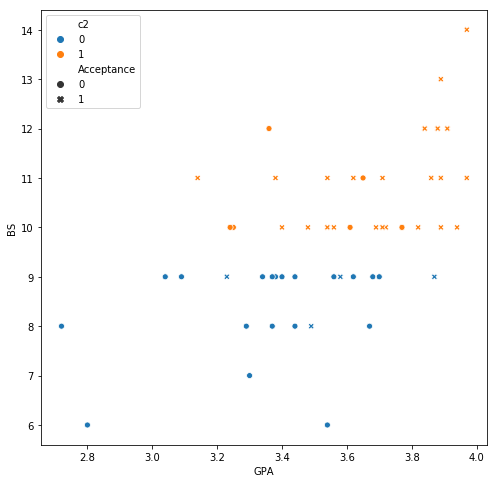

In [22]:
# plot the scatterplot - but hue by cluster
plt.figure(figsize=(8,8))
sns.scatterplot(x="GPA", y="BS", data=med_raw, hue="c2", style="Acceptance")

In [23]:
# lets look at the agreement
pd.crosstab(med_raw['c2'], med_raw['Acceptance'])

Acceptance,0,1
c2,,
0,19,4
1,6,26


In [24]:
# do by percentage of columns going down - how well did the clusters segment the acceptance just using two columns
pd.crosstab(med_raw['c2'], med_raw['Acceptance'], normalize='columns')

Acceptance,0,1
c2,,
0,0.76,0.133333
1,0.24,0.866667


---

# Cluster Quality - Inertia

![](http://rnowling.github.io/images/bps-multinomial-segmentation/pmf_kmeans_inertia.png)

We want to:

- minimize inertia
- but also minimize the number of clusters (too many to manage, and potentially overfitting)
- look for the "elbow" as a rule-of-thumb

In [25]:
# the silhoutte score for the clustering - inside scikit learn metrics
# the process is above is done and averaged for all points
# we feed in the dataset used for clustering, and the cluster labels we got back
kmeans.inertia_

54.29594904891305

---

In [47]:
# lets use all of the numeric data (not just two points) and generate two clusters
med2 = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/MedGPA.csv")

med2.head()

,Unnamed: 0,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
0,1,D,0,F,3.59,3.62,11,9,9.0,9,38,5
1,2,A,1,M,3.75,3.84,12,13,8.0,12,45,3
2,3,A,1,F,3.24,3.23,9,10,5.0,9,33,19
3,4,A,1,F,3.74,3.69,12,11,7.0,10,40,5
4,5,A,1,F,3.53,3.38,9,11,4.0,11,35,11


In [27]:
# drop all missing data
med2.dropna(inplace=True)

In [28]:
# keep just the numeric variables
med_numeric = med2.loc[:, "BCPM":"Apps"]
med_numeric.head()

,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
0,3.59,3.62,11,9,9.0,9,38,5
1,3.75,3.84,12,13,8.0,12,45,3
2,3.24,3.23,9,10,5.0,9,33,19
3,3.74,3.69,12,11,7.0,10,40,5
4,3.53,3.38,9,11,4.0,11,35,11


In [29]:
kmeans = KMeans(n_clusters=2)   # setup cluster algorithm for 2 clusters
kmeans.fit(med_numeric)          # fit the model
k2 = kmeans.predict(med_numeric)   # generate cluster labels
med2['k2'] = k2

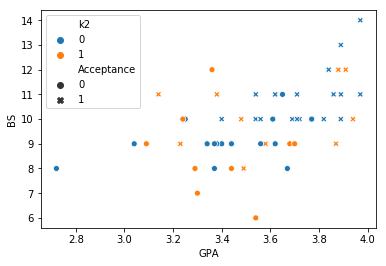

In [30]:
# how did our original plot change
sns.scatterplot(x="GPA", y="BS", data=med2, hue="k2", style="Acceptance")

In [31]:
# interia score  -- did we do better or worse?
kmeans.inertia_

1791.523670294118

----


Above we learned a few things:

1.Clustering is an unsupervised technique, but that doesnt mean our dataset can't have a variable/feature of interest.  We just ignore it and do not include it in our clustering, which allows us to profile by it later

2. The features we use in the clustering matter

3.  We are setting the value of `k`, but are other combinations of `k` better?

We can use our friend the `for` loop to evaluate:

# Exercise 1:  Use a for loop to test your number of clusters

Hints:

- empty list and append values
- define a range of k
- save out the intertia values after the data are fit
- review

In [37]:
inertia = []
for k in range(2,6):
    kmeans = KMeans(n_clusters=k)   # setup cluster algorithm for 2 clusters
    kmeans.fit(med_numeric)          # fit the model
    k_labels = kmeans.predict(med_numeric)   # generate cluster labels
    inertia.append(kmeans.inertia_)

In [38]:
inertia

[1768.9947047619048, 1162.0372509722222, 965.6110565476191, 795.532989311741]

--- 

# Standardize Values

When we use features/columns that are on based on different units, those values with the larger variance get more weight.  We can standardize the values to keep everything on the same footing

In [39]:
# setup the scalter
scaler = StandardScaler() 

In [40]:
# fit the scalter to normalize our dataset
scaler.fit(med_numeric)

/anaconda3/envs/Python_37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
# transform the data
med_scaled = scaler.transform(med_numeric)

/anaconda3/envs/Python_37/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [42]:
med_numeric.head()

,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
0,3.59,3.62,11,9,9.0,9,38,5
1,3.75,3.84,12,13,8.0,12,45,3
2,3.24,3.23,9,10,5.0,9,33,19
3,3.74,3.69,12,11,7.0,10,40,5
4,3.53,3.38,9,11,4.0,11,35,11


In [0]:
type(med_scaled)

In [0]:
med_scaled[0:5]

In [0]:
# put back into a dataframe
med_scaled_df = pd.DataFrame(med_scaled, columns=med_numeric.columns)

In [0]:
med_scaled_df.head()

In [0]:
# describe
med_scaled_df.describe()

In [0]:
# fit a kmeans to the dataset
model = KMeans(n_clusters=2)
model.fit(med_scaled_df)
k2 = model.predict(med_scaled_df)

# how did we do?
model.inertia_

In [0]:
# a plot
med2['k2_scaled'] = k2
sns.scatterplot(x="GPA", y="BS", data=med2, hue="k2_scaled", style="Acceptance")

In [0]:
# profile based on a known outcome which you would think cluster the data
pd.crosstab(med2['k2_scaled'], med2['Acceptance'], normalize='columns')

Check out a number of clusters, now with scaled data

In [0]:
# create an empty list to hold our interia scores
i_scores = []

# create a range of k values to check - 2 to 15 clusters
ks = range(2, 16)

In [0]:
# for each k, fit a kmeans cluster model and save the inertia score
for k in ks:
  kmean = KMeans(n_clusters = k)
  kmeans.fit(med_scaled_df)          # fit the model
  k_labels = kmeans.predict(med_scaled_df)   # generate the cluster labels
  i_scores.append(kmeans.inertia_)    # append the silhoutte score to the list

In [0]:
# plot the data
silo_df = pd.DataFrame({'k':ks, 'score':i_scores}, index=ks)
sns.pointplot(x="k", y="score", data=silo_df)

What would we choose above, and what do we think is happening?

---

# Exercise 2:  Cluster the diamonds


Using the diamonds dataset found here:

`https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv`

Select the appropriate variables, standardize the dataset, and determine the number of clusters.

Hints:

- The clustering technique is intensive on _larger_ datasets, so be patient if you are trying to work through varying numbers of `k`

In [54]:
dd_raw = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv")
dd = dd_raw.loc[:,"depth":"z"]
scaler.fit(dd)
dd_scaled = scaler.transform(dd)
dd_scaled_df = pd.DataFrame(dd_scaled, columns=dd.columns)
print("DONE")

# create an empty list to hold our interia scores
i_scores = []

# create a range of k values to check - 2 to 15 clusters
ks = range(2, 16)

DONE


/anaconda3/envs/Python_37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/Python_37/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [60]:
for k in ks:
  print(k)
  kmean = KMeans(n_clusters = k)
  kmeans.fit(dd_scaled_df)          # fit the model
  k_labels = kmeans.predict(dd_scaled_df)   # generate the cluster labels
  i_scores.append(kmeans.inertia_)    # append the silhoutte score to the list
print("DONE")

2
3
4
5
6
7
8
9
10
11
12
13
14
15
DONE


In [61]:
i_scores

[104676.90180009746,
 104676.87102446766,
 104676.8726113586,
 104676.99646541887,
 104676.95559492728,
 104676.99646541887,
 104677.00286441078,
 104676.92718646323,
 104676.88880771674,
 104676.96935290392,
 104676.793212804,
 104676.99977853942,
 104676.87653556555,
 104676.85088994863,
 104676.96041997542,
 104676.95979859836,
 104677.00527296458,
 104676.95448970111,
 104676.93895118807,
 104676.99646541887,
 104676.78766027749,
 104676.89075285823,
 104676.90993101748,
 104676.84737160463,
 104676.76205073025,
 104676.9537851374,
 104676.93895118807,
 104676.87254367402,
 104677.00297806003,
 104676.99838854342,
 104676.9419796342,
 104676.94833235713,
 104676.99646541887,
 104676.95559492728,
 104676.96430354471,
 104676.94343857458,
 104676.93417269815,
 104676.87590971046,
 104676.99646541887,
 104676.99838854342,
 104676.96430354471,
 104676.98864312036,
 104676.91851686873,
 104676.93757366482,
 104677.03329359026,
 104676.89324422962,
 104676.97153455055,
 104676.9964654188

----



# Hierarchical Clustering


![](https://www.displayr.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-28-at-11.48.48-am.png)

In [62]:
cars = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv", index_col = 0)

In [63]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [64]:
# isolate just the numeric and standardize
cars_scaler = StandardScaler()
cars_scaler.fit(cars)
cars_scaled = cars_scaler.transform(cars)
cars_df = pd.DataFrame(cars_scaled, columns=cars.columns)
cars_df.head()

/anaconda3/envs/Python_37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/Python_37/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
1,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
2,0.456737,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
3,0.220730,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
4,-0.234427,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083


In [65]:
car_hclust = linkage(cars_df, method="complete")

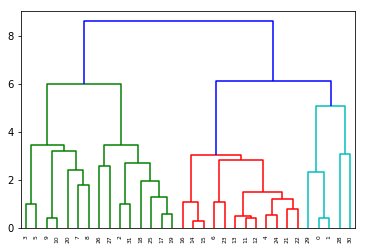

In [66]:
# plot the data
dendrogram(car_hclust,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

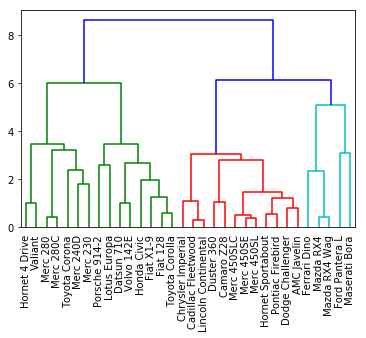

In [67]:
# the labels for the cluster
dendrogram(car_hclust,
           labels = cars.index,
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()


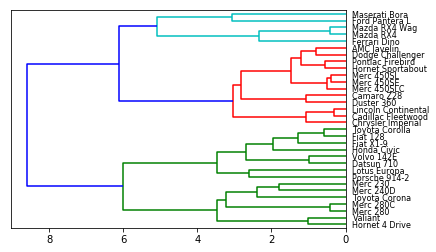

In [68]:
# you can also play around with the orientation
dendrogram(car_hclust,
           labels = cars.index,
           orientation = "left")
plt.show()

Ok, now we can extract the clusters

In [0]:
from scipy.cluster.hierarchy import fcluster

We imported this at the top of the notebook, but the import snippet above gives us `fcluster`, which we can use to extract the clusters that we want.


In [69]:
# cuts the clusters at the distance shown on the dendrogram, the second argument is that distance
clusters = fcluster(car_hclust, 4, criterion='distance')

In [70]:
clusters

array([4, 4, 2, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 2, 2, 5, 4, 5, 2], dtype=int32)

In [107]:
# put these back onto the original dataframe
cars['hc_clust'] = clusters

In [108]:
# how many are in each cluster?
cars.hc_clust.value_counts(sort=False)

1     7
2     8
3    12
4     3
5     2
Name: hc_clust, dtype: int64

In [0]:
# view the data
cars.sort_values("hc_clust").head(40)

In [0]:
# finally, profile the clusters using describe and Transpose
# cars.groupby("hc_clust").describe().T
cars.groupby("hc_clust").mean().T

----

# Exercise 3:  Hierarchical Clustering of 2008 Elections by State

For the dataset below:

`https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Election08.csv`

- Cluster the states

- generate a dendrogram

- determine the number of clusters, 

- and profile if Obama won based on the clusters, which should not be a feature included in the clustering


Documentation on the dataset can be found here:

https://vincentarelbundock.github.io/Rdatasets/doc/Stat2Data/Election08.html

In [110]:
election = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Election08.csv", index_col=2)
election = election.loc[:,"Income":"ObamaWin"]
election.head()

,Income,HS,BA,Dem.Rep,ObamaWin
Abr,,,,,
AL,32404,80.4,21.4,-1,0
AK,40352,90.5,26.0,-11,0
AZ,33029,83.5,25.3,0,0
AR,30060,81.1,19.3,12,0
CA,41571,80.2,29.5,19,1


/anaconda3/envs/Python_37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/Python_37/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


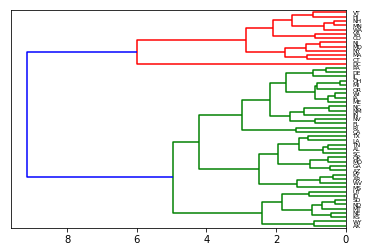

In [112]:
election_scaler = StandardScaler()
election_scaler.fit(election)
election_scaled = election_scaler.transform(election)
election_df = pd.DataFrame(election_scaled, columns=election.columns)
election_df.head()
election_hclust = linkage(election_df, method="complete")
dendrogram(election_hclust,
           labels = election.index,
           orientation = "left")
plt.show()

In [113]:
election_clusters = fcluster(election_hclust, 4, criterion='distance')
election['hc_clust'] = election_clusters
election_clusters

array([2, 1, 2, 2, 3, 4, 4, 3, 5, 3, 2, 4, 1, 3, 3, 3, 1, 2, 2, 3, 4, 4,
       3, 4, 2, 2, 1, 1, 3, 4, 4, 3, 4, 3, 1, 3, 2, 3, 3, 3, 2, 1, 2, 2,
       1, 4, 4, 4, 2, 3, 1], dtype=int32)

In [114]:
election.hc_clust.value_counts(sort=False)

1     9
2    13
3    16
4    12
5     1
Name: hc_clust, dtype: int64

In [115]:
election.groupby("hc_clust").mean().T

hc_clust,1,2,3,4,5
Income,35601.333333,32555.461538,36746.12500,43921.416667,61092.0
HS,89.577778,81.584615,85.83125,88.350000,85.7
BA,26.288889,22.115385,25.89375,33.216667,47.5
Dem.Rep,-8.000000,6.230769,17.50000,22.000000,75.0
ObamaWin,0.000000,0.000000,1.00000,1.000000,1.0




---



# Plotting and Other Linkage Methods for Hierarchical Clustering

In [71]:
# Seaborn also can visualize clusters -- it does a lot of above under the hood
election = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Election08.csv", index_col=2)
election2 = election.loc[:, "Income":"Dem.Rep"]
election2.head()

,Income,HS,BA,Dem.Rep
Abr,,,,
AL,32404,80.4,21.4,-1
AK,40352,90.5,26.0,-11
AZ,33029,83.5,25.3,0
AR,30060,81.1,19.3,12
CA,41571,80.2,29.5,19


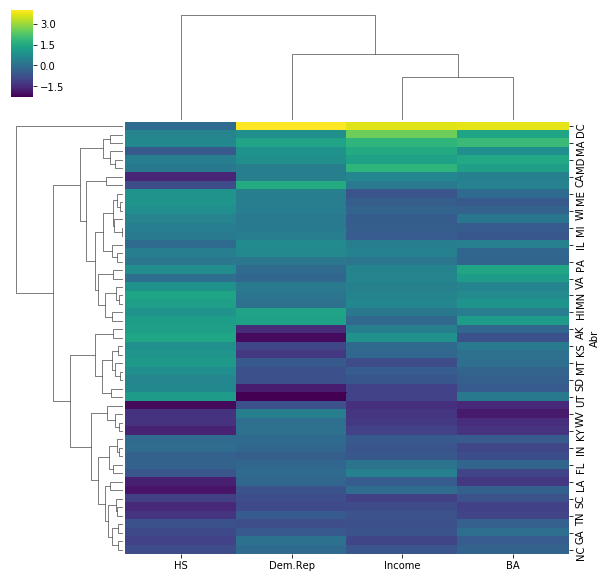

In [72]:
# seaborn will cluster rows/columns, = standardizing each column with a z_score (0 for rows, 1 for columns)
sns.clustermap(election2, z_score=1, cmap="viridis", metric="euclidean", method="complete")

There are other linkage methods that we can try.  These are determining how to group the rows based on similarity or dissimilarity.

In [73]:
# for the election data, try 4 different methods
link_single = linkage(election2, method="single")
link_complete = linkage(election2, method="average")
link_average = linkage(election2, method="average")
link_ward = linkage(election2, method="ward")

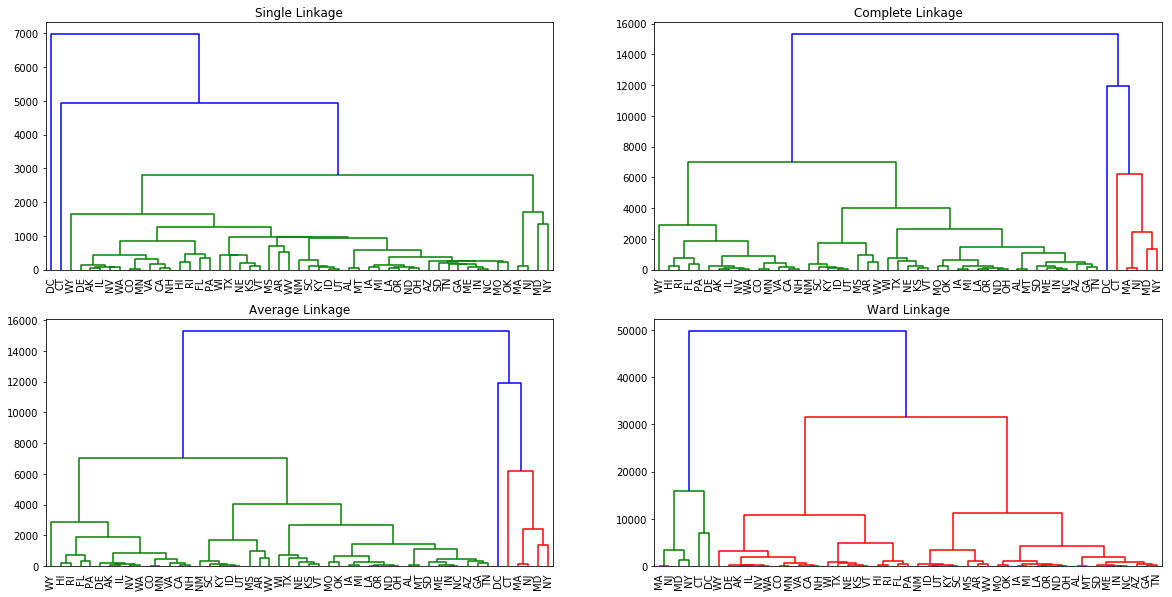

In [74]:
# create a 2x2 plot -- starts at 1, not zero, for the third number
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.title("Single Linkage")
dendrogram(link_single,
           labels = election2.index,
           leaf_rotation=90,
           leaf_font_size=10)

plt.subplot(2, 2, 2)
plt.title("Complete Linkage")
dendrogram(link_complete,
           labels = election2.index,
           leaf_rotation=90,
           leaf_font_size=10)

plt.subplot(2, 2, 3)
plt.title("Average Linkage")
dendrogram(link_average,
           labels = election2.index,
           leaf_rotation=90,
           leaf_font_size=10)

plt.subplot(2, 2, 4)
plt.title("Ward Linkage")
dendrogram(link_ward,
           labels = election2.index,
           leaf_rotation=90,
           leaf_font_size=10)

plt.show()




---



# Exercise 4:  Avacado Prices

Your consulting firm has been asked by Hass avacado to generate a market segmentation strategy based on their weekly sales data by region.

The dataset can be found below:

`https://raw.githubusercontent.com/Btibert3/is834/master/datasets/avocado.csv`

You will need to aggregate the data (ultimately one row per region) and cluster the markets.  You should use both clustering techniques above and profile the final cluster solution.

Information on the dataset can be found on Kaggle below:

https://www.kaggle.com/neuromusic/avocado-prices